## **Multivariables Linear Regression using Gradient Descent**


This practical work demonstrates how to implement linear regression using gradient descent in Python. The tasks include initializing parameters, iterating through data points to minimize the cost function, and visualizing the results. Here is a step-by-step explanation with the complete code implementation:


#### **Import Necessary Libraries**


In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

#### **Load the Data**

- The first three columns are x1,x2, and x3.

- The last column is the target label y.


In [ ]:
data = pd.read_csv("./Data/Multivariables_LR_Data.csv")

In [190]:
data.head()

,X1,X2,X3,y
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [191]:
data.shape

(25, 4)

#### **Define Variables 𝑋 and 𝑦**


In [192]:
# assign the first column to X
X = data.drop("y", axis=1).values

# assign the second column to y
y = data["y"].values.reshape(-1, 1)

#### **Explore Data**


In [193]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [194]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### **MultiVariables Linear Regression Full Implementation**


**Vectorize your implementation.**

<b>Notes:</b>

- You need to add column that contains ones to the data. This column represent x₀ feature for theta_0.
- Use learninig rate = 0.0001.


#### **Add a column of ones**


In [195]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [196]:
X.shape, y.shape

((25, 4), (25, 1))

#### **Step 1: Initialize Parameters**


In [197]:
m, n = X.shape

In [198]:
lr = 0.0001
theta = np.zeros((n, 1))

print("Theta_Init: \n", theta)

Theta_Init: 
 [[0.]
 [0.]
 [0.]
 [0.]]


#### **Step 2: Implement the Hypothesis Function**


predict the output


$$h_\theta(x) = X \theta$$


In [199]:
h_x = X @ theta  # (m,n) * (n,1) = (m,1)
h_x

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

#### **Step 3: Calculate the Cost Function $J(\theta)$ (MSE)**


**Error Calculation**:
$$\text{Error} = h_x - y$$


In [200]:
error = h_x - y
print("Error Vector:\n", error)

Error Vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]


**Cost Function**


$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (e^{(i)})^2$$


In [201]:
J_theta = (1 / (2 * m)) * np.sum(error**2)
print("Cost Function J(θ) =", J_theta)

Cost Function J(θ) = 13405.98


$$J(\theta) = \frac{\| \text{Error} \|_2^2}{2m}$$


In [202]:
J_theta = (np.linalg.norm(error) ** 2) / (2 * m)
print("Cost Function J(θ) =", J_theta)

Cost Function J(θ) = 13405.98


$$J(\theta) = \frac{\text{Error}^T \cdot \text{Error}}{2m}$$


In [203]:
error.T.shape, error.shape

((1, 25), (25, 1))

In [204]:
J_theta = ((error.T @ error)[0, 0]) / (2 * m)
print("Cost Function J(θ) =", J_theta)

Cost Function J(θ) = 13405.98


#### **Step 4: Compute the Gradient**


$$\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}$$

$$\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\text{Error}^{(i)} x_j^{(i)})$$


In [205]:
X.T.shape, error.shape

((4, 25), (25, 1))

In [206]:
gradient_theta = (1 / m) * (X.T @ error)
gradient_theta

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

#### **Step 5: Update Parameters (Simultaneously)**


**Gradient Descent Function Update Rules**

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta})$$


In [207]:
theta.shape, gradient_theta.shape

((4, 1), (4, 1))

In [208]:
theta = theta - (lr * gradient_theta)
theta

array([[0.016204],
       [1.30758 ],
       [1.31472 ],
       [1.346708]])

#### **Step 6: Iterate Until Convergence**


Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.


In [209]:
# initialization
lr = 0.00001
theta = np.zeros((n, 1))
loss = []
max_iter = 100

for i in range(max_iter):
    print(f" Iteration {i+1} ".center(60, "—") + "\n")

    h_x = X @ theta  # (m,n) * (n,1) = (m,1)
    print("h(x):\n", h_x.ravel(), "\n")

    error = h_x - y
    print("Error Vector:\n", error.ravel(), "\n")

    J_theta = (np.linalg.norm(error) ** 2) / (2 * m)
    loss.append(J_theta)
    print("Cost Function J(θ):", J_theta, "\n")

    gradient_theta = (X.T @ error) / m  # (n,m) * (m,1) = (n,1)
    print("Gradient_Theta (▽(θ) == dg/dθ):", gradient_theta.ravel(), "\n")

    gv_norm = np.linalg.norm(gradient_theta)
    print("Gradient Vector Norm: ", gv_norm, "\n")
    if gv_norm < 0.01:
        break

    temp_theta = theta - (lr * gradient_theta)
    theta = temp_theta
    print("Updated Theta:", theta.ravel(), "\n")

——————————————————————— Iteration 1 ————————————————————————

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 

Error Vector:
 [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.] 

Cost Function J(θ): 13405.98 

Gradient_Theta (▽(θ) == dg/dθ): [  -162.04 -13075.8  -13147.2  -13467.08] 

Gradient Vector Norm:  22917.5459892197 

Updated Theta: [0.0016204 0.130758  0.131472  0.1346708] 

——————————————————————— Iteration 2 ————————————————————————

h(x):
 [30.1650244 36.2560348 35.7234064 38.9057244 27.6510624 20.3864004
 29.122502  21.5899264 33.8842264 31.3855728 28.0579308 27.6659996
 36.9069972 30.6802308 29.2564588 36.7915192 29.2187588 34.9498828
 35.1854372 31.482572  34.1507404 34.0132136 32.5599384 30.4130312
 37.5750104] 

Error Vector:
 [-121.8349756 -148.7439652 -144.2765936 -157.0942756 -114.3489376
  -80.6135996 -119.877498   -93.4100736

---


#### **Summary**


In [210]:
def gradient_descent(
    X, y, lr=0.1, max_iter=10000, loss_threshold=0.0001, gradient_threshold=0.001
):

    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize theta with zeros
    loss = []

    for i in range(max_iter):
        # Compute predictions
        h_x = X @ theta  # (m,n) * (n,1) = (m,1)

        # Calculate error
        error = h_x - y

        # Compute cost (Mean Squared Error)
        J_theta = (1 / (2 * m)) * np.sum(error**2)
        loss.append(J_theta)

        # Check for convergence based on loss difference
        if i > 0 and np.abs(loss[i - 1] - loss[i]) < loss_threshold:
            print(f"Loss change convergence achieved at iteration {i + 1}")
            break

        # Compute gradients
        gradient_theta = (1 / m) * (X.T @ error)

        # Compute gradient norm
        gradient_norm = np.linalg.norm(gradient_theta)

        # Check for convergence based on gradient norm
        if gradient_norm < gradient_threshold:
            print(f"Gradient norm convergence achieved at iteration {i + 1}")
            break

        # Update parameters
        theta -= lr * gradient_theta

    return theta, loss


final_theta, loss = gradient_descent(
    X, y, lr=0.0001, max_iter=1000, loss_threshold=0.01, gradient_threshold=0.01
)
print("Updated Theta:", final_theta.ravel())

Loss change convergence achieved at iteration 154
Updated Theta: [0.00787922 0.61241733 0.61391507 0.79980931]


---


#### **Predict y values using the LR equation**

$$h_\theta(x) = X \theta$$


In [211]:
y_pred = X @ final_theta
print("h(x) = y_predict:\n", y_pred.ravel())
print("\ny_actual:\n", y.ravel())

h(x) = y_predict:
 [153.8132482  185.36948297 182.36213092 198.94455083 141.21939069
 104.69560303 149.27970709 111.15929628 173.77031544 161.74612255
 143.62480957 141.96746087 188.06726983 155.88813357 150.07801866
 188.38282597 148.20709434 179.24830513 179.16439142 160.31669869
 175.00563426 174.199834   166.71517317 154.29300816 191.87592893]

y_actual:
 [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


#### **Evaluate Model**


**Use R2 score to evaluate LR equation output**

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [212]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9831719447283898


#### **Plot Loss Function**


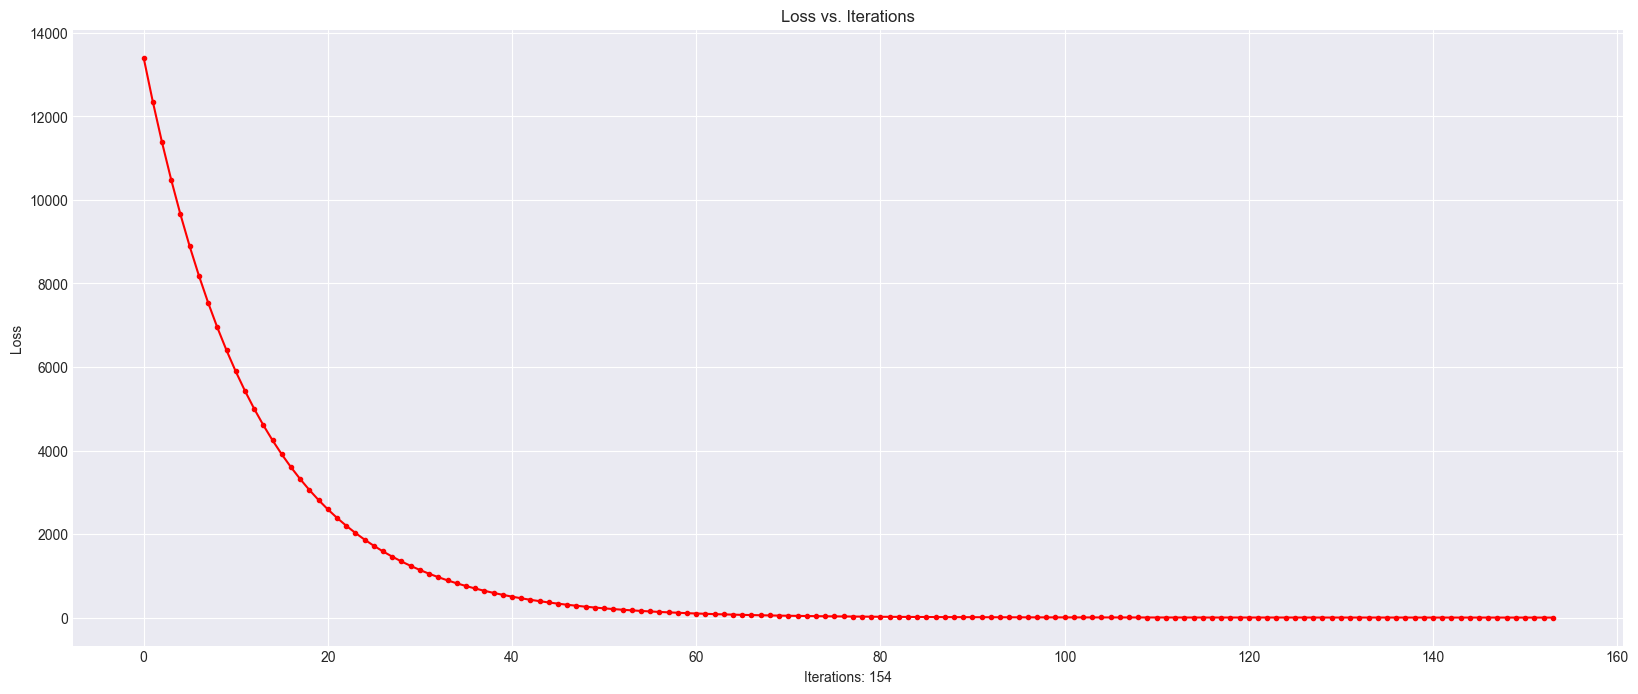

In [213]:
plt.figure(figsize=(20, 8))
plt.plot(loss, ".-r")
plt.title("Loss vs. Iterations")
plt.xlabel(f"Iterations: {len(loss)}")
plt.ylabel("Loss")
plt.show()

---
